Each proposal should include the following sections: **FILL IN THIS SECTION**

Title


Introduction:

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


Preliminary exploratory data analysis:

- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.
**Started on this**


Methods:

- Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
- Describe at least one way that you will visualize the results


Expected outcomes and significance:

- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?

In [1]:
# config cell
library(tidyverse)



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



Column Definitions:
age: age in years


sex: (1 = male; 0 = female)

chest_pain_type: chest pain type \
-- Value 1: typical angina \
-- Value 2: atypical angina \
-- Value 3: non-anginal pain \
-- Value 4: asymptomatic

resting_blood_pressure: resting blood pressure (in mm Hg on admission to the hospital) 

cholestoral_level_(mg/dl):   serum cholestoral in mg/dl

high_fasting_blood_sugar: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting_ecg_results: resting electrocardiographic results \
-- Value 0: normal \
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) \
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

max_heart_rate: maximum heart rate achieved

exercise_induced_angina: (1 = yes; 0 = no)

ST_depression_induced_by_exercise: ST depression induced by exercise relative to rest

slope_of_peak_exercise_ST_segment: \
-- Value 1: upsloping \
-- Value 2: flat \
-- Value 3: downsloping

num_blood_vessels_colored: number of major vessels (0-3) colored by flourosopy

thal: 3 = normal; 6 = fixed defect (no blood flow in some parts of heart); 7 = reversable defect (blood flow is present but abnormal)

diagnosis: diagnosis of heart disease: 0-4, severity of diagnosis 


In [4]:
#load data and configure categorical columns to factor
heart_disease_data <- read_csv("data/processed.cleveland.data", 
                               col_names=c("age",
                                           "sex",
                                           "chest_pain_type",
                                           "resting_blood_pressure",
                                           "cholestoral_level_(mg/dl)",
                                           "high_fasting_blood_sugar",
                                           "resting_ecg_results",
                                           "max_heart_rate",
                                           "exercise_induced_angina",
                                           "ST_depression_induced_by_exercise",
                                           "slope_of_peak_exercise_ST_segment",
                                           "num_blood_vessels_colored",
                                           "thal",
                                           "diagnosis")) |>
                        mutate(sex = as_factor(sex)) |>
                        mutate(chest_pain_type = as_factor(chest_pain_type)) |>
                        mutate(high_fasting_blood_sugar = as_factor(high_fasting_blood_sugar)) |>
                        mutate(resting_ecg_results = as_factor(resting_ecg_results)) |>
                        mutate(exercise_induced_angina = as_factor(exercise_induced_angina)) |>
                        mutate(ST_depression_induced_by_exercise = as_factor(ST_depression_induced_by_exercise)) |>
                        mutate(slope_of_peak_exercise_ST_segment = as_factor(slope_of_peak_exercise_ST_segment)) |>
                        mutate(num_blood_vessels_colored = as_factor(num_blood_vessels_colored)) |>
                        mutate(thal = as_factor(thal))

heart_disease_data_simplified <- heart_disease_data |>
                        mutate(diagnosis_simple = ifelse(diagnosis > 0,1,0)) |>
                        mutate(diagnosis = as_factor(diagnosis)) |>
                        mutate(diagnosis_simple = as_factor(diagnosis_simple))
          
                                                   
                                                   
                                                   

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): num_blood_vessels_colored, thal
dbl (12): age, sex, chest_pain_type, resting_blood_pressure, cholestoral_lev...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,chest_pain_type,resting_blood_pressure,cholestoral_level_(mg/dl),high_fasting_blood_sugar,resting_ecg_results,max_heart_rate,exercise_induced_angina,ST_depression_induced_by_exercise,slope_of_peak_exercise_ST_segment,num_blood_vessels_colored,thal,diagnosis,diagnosis_simple
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3,1
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2,1


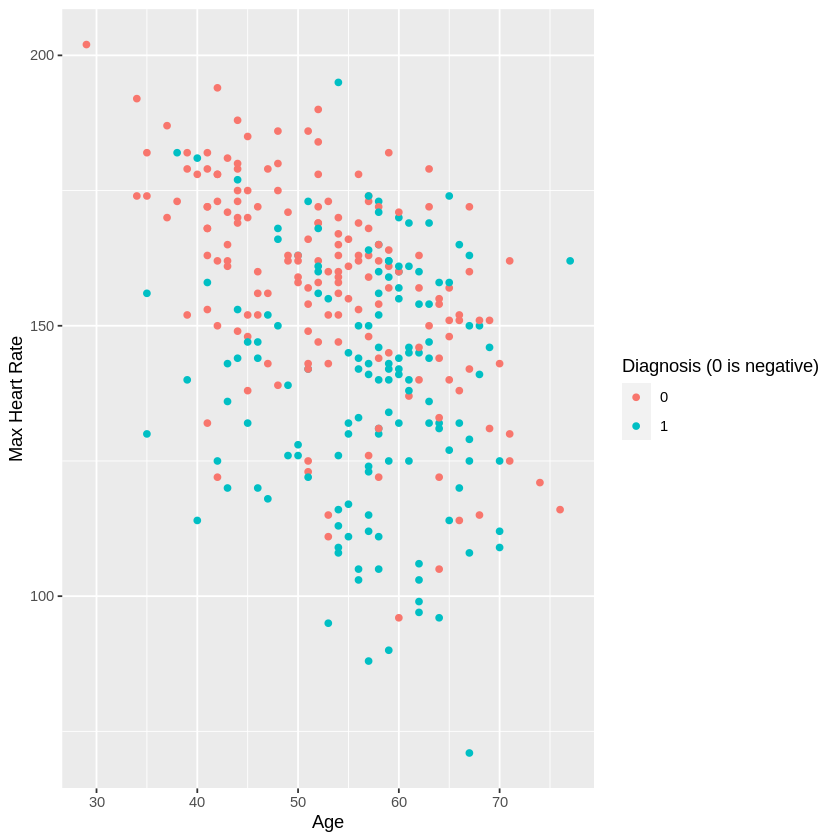

In [3]:
heart_plot <- heart_disease_data_simplified |>
            ggplot(aes(x=age,y=max_heart_rate,color=diagnosis_simple)) +
            geom_point() +
            labs(x="Age",
                 y="Max Heart Rate",
                 color="Diagnosis (0 is negative)")
heart_plot